In [28]:
# NOTE: Run this in Python 2.7
import requests
import urllib
import imdb
import lxml.html

### Team MovieGnat

### Milestone 1: Getting to know your data, due Wednesday, April 5, 2017

In the beginning you should get acquainted with the data sources and do some EDA. Sign up for the TMDb [API](https://www.themoviedb.org/documentation/api), and try to download the poster of your favorite movie from within your notebook. Compare the genre entries of IMDb and TMDb for this movie and see if they are the same. Think about and write down some questions that you would like to answer in the following weeks. Keep the storytelling aspect of your final report in mind and do some pen and paper sketches about the visualizations you would like to produce. Include photographs of those sketches in your notebook. 

Most of the time a data scientist spends on a project is spend on cleaning the data. We are lucky that the data we have is already pretty clean. The Python interface to the IMDb ftp files does a lot of the additional work of cleaning as well. However, you will notice that the genre list for each movie from both databases can have different lengths. This needs to be changed in order to train a model to predict the movie genre. It is up to you to think about possible ways to address this problem and to implement one of them. There is no absolute right answer here. It depends on your interests and which questions you have in mind for the project. 

Optionally, you could also scrape additional data sources, such as Wikipedia, to obtain plot summaries. That data may give you additional useful features for genera classification. 

To guide your decision process, provide at least one visualization of how often genres are mentioned together in pairs. Your visualization should clearly show if a horror romance is more likely to occur in the data than a drama romance.

The notebook to submit for this milestone needs to at least include:

- API code to access the genre and movie poster path of your favorite movie
- Genre for this movie listed by TMDb and IMDb
- A list of the 10 most popular movies of 2016 from TMDb and their genre obtained via the API
- Comments on what challenges you see for predicting movie genre based on the data you have, and how to address them 
- Code to generate the movie genre pairs and a suitable visualization of the result
- Additional visualization sketches and EDA with a focus on movie genres
- A list of questions you could answer with this and related data. Get creative here!

The EDA questions do not necessarily have to tie into the modeling part later on. Think freely about things that might be interesting, like which actors are very specific to a genre? Are action movies more prone to producing sequels than romances? However, as you keep the focus on movie genres, think also about correlations you might discover that can help building features from the metadata for prediction. Is the length of a movie title correlated with genre?


In [26]:
def requestResults(url):
    r = requests.get(BASE_URL + url + "&api_key=" + API_KEY)
    return r.json()

# Constants
BASE_URL = "https://api.themoviedb.org/3/"
API_KEY = "9767d17413ec9d9729c2cca238df02da"
GENRE_MAP = {}
for g in requestResults("genre/movie/list?x=1")[u'genres']:
    GENRE_MAP[g['id']] = g['name']

# Download image
def downloadImageToFile(imgpath, filename):
    # Does not return anything
    urllib.urlretrieve("https://image.tmdb.org/t/p/w500" + imgpath, filename)
    
# Get genre and poster path of one movie by title
def genreAndPosterPath(title):
    title_query = urllib.urlencode({'query': title})
    result = requestResults("search/movie?" + title_query + "&language=en-US&page=1&include-adult=false")[u'results'][0]
    genre_ids = result['genre_ids']
    genres = [str(GENRE_MAP[gid]) for gid in genre_ids]
    poster_path = result['poster_path']
    return genres, poster_path

# Get genres from IMDB for one movie by title
def imdbGenresByTitle(title):
    ###add
    imdb_access = imdb.IMDb()
    ##
    id_ = imdb_access.search_movie(title)[0].__repr__().split('id:')[1].split('[')[0]
    hxs = lxml.html.document_fromstring(requests.get("http://www.imdb.com/title/tt" + id_).content)
    return hxs.xpath("//a[contains(@href, 'genre')]/text()")[1:]

# Get genres from TMDB for one movie by title
def tmdbGenresByTitle(title):
    title_query = urllib.urlencode({'query': title})
    genre_ids = requestResults("search/movie?" + title_query + "&language=en-US&page=1&include-adult=false")[u'results'][0]['genre_ids']
    return _mapGidsToGenres(genre_ids)

# Private helper function that maps genre_ids to genres
def _mapGidsToGenres(genre_ids):
    return [str(GENRE_MAP[gid]) for gid in genre_ids]

# EXAMPLES
# requestResults("discover/movie?sort_by=popularity.desc")[u'results'][0] # Get top 10 most popular results
# downloadImageToFile('/tnmL0g604PDRJwGJ5fsUSYKFo9.jpg', 't2s.jpg') # Download an image to the file t2s.jpg

In [3]:
# Genre and movie poster path of your favorite movie from TMDB
fave_movie = 'Logan'

genres, poster_path = genreAndPosterPath(fave_movie)
print 'Fave movie: %s\n================\nGenres: %s\nPoster Path: %s' % (fave_movie, ', '.join(map(str, genres)), poster_path)

Fave movie: Logan
Genres: Action, Drama, Science Fiction
Poster Path: /45Y1G5FEgttPAwjTYic6czC9xCn.jpg


In [4]:
genres

['Action', 'Drama', 'Science Fiction']

In [5]:
poster_path

u'/45Y1G5FEgttPAwjTYic6czC9xCn.jpg'

In [6]:
fave_movie2 = "Beauty and the beast"
genreAndPosterPath(fave_movie2)

(['Fantasy', 'Music', 'Romance'], u'/tnmL0g604PDRJwGJ5fsUSYKFo9.jpg')

In [125]:
# Genre for this movie listed by TMDb and IMDb
imdb_genres_fave = imdbGenresByTitle(fave_movie)
tmdb_genres_fave = tmdbGenresByTitle(fave_movie)
print 'Genres of fave movie: %s\n================' % fave_movie
print 'IMDB: %s' % ', '.join(map(str, imdb_genres_fave))
print 'TMDB: %s' % ', '.join(map(str, tmdb_genres_fave))

# Challenge: Sci-Fi from IMDB is Science Fiction in TMDB! Need to find a genre mapping between both IMDB and TMDB.

Genres of fave movie: Logan
IMDB:  Action,  Drama,  Sci-Fi,  Thriller
TMDB: Action, Drama, Science Fiction


In [18]:
id = imdb_access.search_movie('Logan')[0].__repr__().split('id:')[1].split('[')[0]
id

'3315342'

In [24]:
hxs = lxml.html.document_fromstring(requests.get("http://www.imdb.com/title/tt" + id).content)
hxs

<Element html at 0x1071eaaf8>

In [25]:
imdbGenresByTitle(fave_movie)

[' Action', ' Drama', ' Sci-Fi', ' Thriller']

In [15]:
tmdbGenresByTitle(fave_movie)

['Action', 'Drama', 'Science Fiction']

In [13]:
def top10movies_tmdb():
    results = requestResults("discover/movie?sort_by=popularity.desc")[u'results'][:10]
    return [{'title': str(r['title']), 'genres': _mapGidsToGenres(r['genre_ids'])} for r in results]

# Print top 10 movies
top10movies_dict = top10movies_tmdb()
print 'Top 10 movies and their genres: \n================'
for m in top10movies_dict:
    print '%s: %s' % (m['title'], ', '.join(map(str, m['genres'])))

Top 10 movies and their genres: 
Beauty and the Beast: Fantasy, Music, Romance
Logan: Action, Drama, Science Fiction
Sing: Animation, Comedy, Drama, Family, Music
Kong: Skull Island: Science Fiction, Action, Adventure, Fantasy
Jurassic World: Action, Adventure, Science Fiction, Thriller
Fantastic Beasts and Where to Find Them: Adventure, Action, Fantasy
Finding Dory: Adventure, Animation, Comedy, Family
Interstellar: Adventure, Drama, Science Fiction
Life: Horror, Science Fiction, Thriller
Mad Max: Fury Road: Action, Adventure, Science Fiction, Thriller


In [33]:
# Top 10 movies
top10movies = requestResults("discover/movie?sort_by=popularity.desc")[u'results'][1]
print(top10movies)
str(top10movies['original_language'])

{u'poster_path': u'/45Y1G5FEgttPAwjTYic6czC9xCn.jpg', u'title': u'Logan', u'overview': u"In the near future, a weary Logan cares for an ailing Professor X in a hide out on the Mexican border. But Logan's attempts to hide from the world and his legacy are up-ended when a young mutant arrives, being pursued by dark forces.", u'release_date': u'2017-02-28', u'popularity': 116.085356, u'original_title': u'Logan', u'backdrop_path': u'/5pAGnkFYSsFJ99ZxDIYnhQbQFXs.jpg', u'vote_count': 1958, u'video': False, u'adult': False, u'vote_average': 7.6, u'original_language': u'en', u'id': 263115, u'genre_ids': [28, 18, 878]}


'en'

In [35]:
str(requestResults("discover/movie?sort_by=popularity.desc")[u'results'][0]['poster_path'])

'/tnmL0g604PDRJwGJ5fsUSYKFo9.jpg'

In [36]:
GENRE_MAP

{12: u'Adventure',
 14: u'Fantasy',
 16: u'Animation',
 18: u'Drama',
 27: u'Horror',
 28: u'Action',
 35: u'Comedy',
 36: u'History',
 37: u'Western',
 53: u'Thriller',
 80: u'Crime',
 99: u'Documentary',
 878: u'Science Fiction',
 9648: u'Mystery',
 10402: u'Music',
 10749: u'Romance',
 10751: u'Family',
 10752: u'War',
 10770: u'TV Movie'}

In [39]:
imdb_access.search_movie("Logan")

[<Movie id:3315342[http] title:_Logan (2017)_>,
 <Movie id:1483010[http] title:_Logan (2010)_>,
 <Movie id:5446102[http] title:_"Logan" (2016)_>,
 <Movie id:5439796[http] title:_Logan Lucky (2017)_>,
 <Movie id:0074812[http] title:_Logan's Run (1976)_>,
 <Movie id:0075527[http] title:_"Logan's Run" (1977)_>,
 <Movie id:0402344[http] title:_Logan's Run (in development) (????)_>,
 <Movie id:6193484[http] title:_"Logan Paul Vs" (2016)_>,
 <Movie id:0058812[http] title:_"Hogan's Heroes" (1965)_>,
 <Movie id:3387648[http] title:_The Taking of Deborah Logan (2014)_>,
 <Movie id:5321214[http] title:_Jack Logan (2016)_>,
 <Movie id:0065000[http] title:_Slogan (1969)_>,
 <Movie id:2814388[http] title:_Logan (2013)_>,
 <Movie id:4067420[http] title:_"Super Mario Logan" (2007)_>,
 <Movie id:6340112[http] title:_Bogan (2017)_>,
 <Movie id:2198638[http] title:_"Logan" (2012)_>,
 <Movie id:1744793[http] title:_The Kate Logan Affair (2010)_>,
 <Movie id:0062824[http] title:_Coogan's Bluff (1968)_>,
 

In [40]:
imdb_access.search_movie("Logan")[0].keys()

['kind',
 'year',
 'title',
 'canonical title',
 'long imdb title',
 'long imdb canonical title',
 'smart canonical title',
 'smart long imdb canonical title']

In [42]:
imdb_access.search_movie("Logan")[0]['year']

2017

# TODO: Visualization
- numeric columns per movie: average vote, vote count, popularity

- regression between vote and popularity
  
- adults % by genre

- language % by genre

- number of genres each month

In [64]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
requestResults("discover/movie?sort_by=popularity.desc")[u'results'][0]

{u'adult': False,
 u'backdrop_path': u'/6aUWe0GSl69wMTSWWexsorMIvwU.jpg',
 u'genre_ids': [14, 10402, 10749],
 u'id': 321612,
 u'original_language': u'en',
 u'original_title': u'Beauty and the Beast',
 u'overview': u"A live-action adaptation of Disney's version of the classic 'Beauty and the Beast' tale of a cursed prince and a beautiful young woman who helps him break the spell.",
 u'popularity': 185.891157,
 u'poster_path': u'/tnmL0g604PDRJwGJ5fsUSYKFo9.jpg',
 u'release_date': u'2017-03-15',
 u'title': u'Beauty and the Beast',
 u'video': False,
 u'vote_average': 7.2,
 u'vote_count': 1044}

In [47]:
#three numeric columns 'popularity' + 'vote_average' + 'vote_count'
requestResults("discover/movie?sort_by=popularity.desc")[u'results'][0]['popularity']
#type is float

185.891157

In [80]:
#Top10movies based on popularity
top200_movies = requestResults("discover/movie?sort_by=popularity.desc")[u'results'][:5]
type(top200_movies)

list

In [83]:
import math
def top_n_movies_tmdb(N):
    # only 20 results per page so need to send multiple request and increment page number 
    results_per_page = 20.0
    results = []
    num_pages = int(math.ceil(N/results_per_page))
    if num_pages == 1:
        results = requestResults("discover/movie?sort_by=popularity.desc")[u'results'][:N]
    else:
        for n in range(1, num_pages+1):
            result = requestResults("discover/movie?sort_by=popularity.desc&page={}".format(n))
            try:
                r= result[u'results']
                results = results + r
            except KeyError:
                pass
    return results

In [91]:
top200_movies = []
top200_movies = top_n_movies_tmdb(200)

In [93]:
population_top200 = []
vote_average_top200 = []
vote_count_top200 = []

for movie in top200_movies:
    population_top200.append(movie['popularity'])
    vote_average_top200.append(movie['vote_average'])
    vote_count_top200.append(movie['vote_count'])

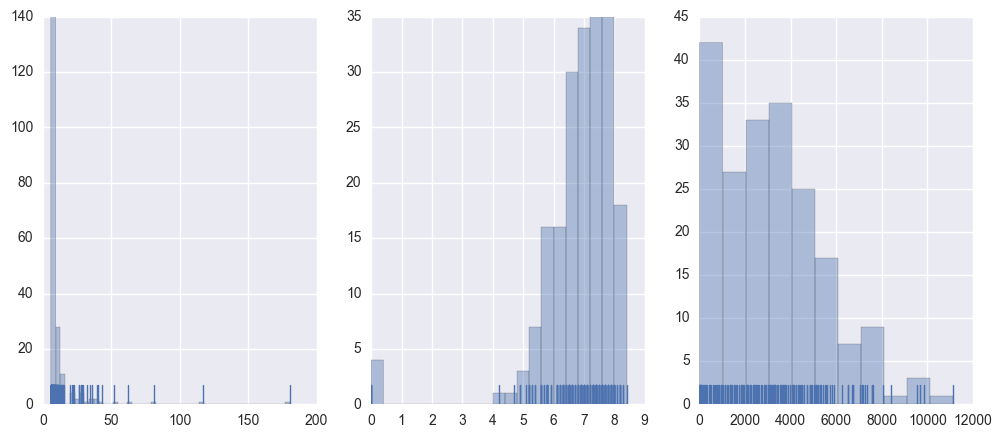

In [94]:
#fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
fig, axs = plt.subplots(1,3)
fig.set_size_inches(12, 5)
sns.distplot(population_top200, kde=False, rug=True, ax=axs[0])
sns.distplot(vote_average_top200, kde=False, rug=True, ax=axs[1])
sns.distplot(vote_count_top200, kde=False, rug=True, ax=axs[2])

In [95]:
m,b = np.polyfit(vote_average_top200, population_top200, 1)
print(m)
print(b)

0.308353086342
9.94215854559


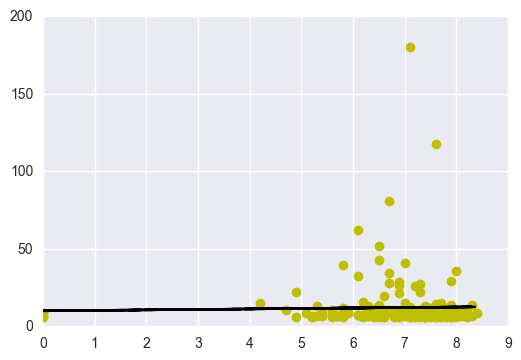

In [96]:
x = vote_average_top200
y = population_top200

fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'yo', x, fit_fn(x), '--k')

In [97]:
top200_movies[0]

{u'adult': False,
 u'backdrop_path': u'/6aUWe0GSl69wMTSWWexsorMIvwU.jpg',
 u'genre_ids': [14, 10402, 10749],
 u'id': 321612,
 u'original_language': u'en',
 u'original_title': u'Beauty and the Beast',
 u'overview': u"A live-action adaptation of Disney's version of the classic 'Beauty and the Beast' tale of a cursed prince and a beautiful young woman who helps him break the spell.",
 u'popularity': 180.45132,
 u'poster_path': u'/tWqifoYuwLETmmasnGHO7xBjEtt.jpg',
 u'release_date': u'2017-03-17',
 u'title': u'Beauty and the Beast',
 u'video': False,
 u'vote_average': 7.1,
 u'vote_count': 1246}

In [98]:
type(top200_movies[0]['adult'])

bool

In [99]:
top200_movies[0]['genre_ids']

[14, 10402, 10749]

In [102]:
#adults % by genre
adult = []
genre_adult = dict()
for movie in top200_movies:
    adult_bool = movie['adult']
    adult.append(adult_bool)
    if adult_bool:
        genre_ids = movie['genre_ids']
        for genre_id in genre_ids:
            if genre_id in genre_adult:
                genre_adult[genre_id] += 1
            else:
                genre_adult[genre_id] = 1

In [104]:
sum(adult) #NO ADULT

0

In [107]:
#language % by genre
str(top200_movies[0]['original_language'])

'en'

In [110]:
languages = []
genre_language = dict()
for movie in top200_movies:
    language = str(movie['original_language'])
    if language not in languages:
        languages.append(language)
    else:
        pass
    #genre_ids = movie['genre_ids']

In [111]:
languages

['en', 'it', 'no', 'el', 'fr', 'ja', 'es']

In [117]:
def language_genre(lan):
    lan_genre = dict()
    for movie in top200_movies:
        language = str(movie['original_language'])
        genre_ids = movie['genre_ids']
        if language == lan:
            for genre_id in genre_ids:
                if genre_id in genre_adult:
                    lan_genre[genre_id] += 1
                else:
                    lan_genre[genre_id] = 1     
    return lan_genre

In [118]:
for lan in languages:
    print(language_genre(lan))

{10752: 1, 80: 1, 10402: 1, 35: 1, 36: 1, 37: 1, 12: 1, 878: 1, 16: 1, 27: 1, 18: 1, 9648: 1, 14: 1, 99: 1, 53: 1, 28: 1, 10749: 1, 10751: 1}
{27: 1}
{18: 1}
{18: 1}
{18: 1, 35: 1}
{12: 1, 14: 1, 16: 1, 878: 1, 28: 1, 10751: 1}
{10752: 1, 18: 1, 14: 1}
